# Twitter API


### Import Dependencies

In [1]:
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tweepy
import json
import datetime
import time
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Setup Tweepy API Authentication

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_user = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]
sentiments = []

## Create a module for analyzing twitter sentiments

In [18]:
def twitter_search(user):
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
    
        # Loop through all tweets
        for tweet in public_tweets:
    
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
    
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Text": tweet['text'],
                               "User": user})
            
            time = public_tweets[0]['created_at']
            convert_time(time)
            
    plt.scatter(np.arange(len(compound_list)), compound_list, marker = 'o')
    plt.title(f"Sentiment Analysis of Tweets for {time}")
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Time stamp")
    #plt.xticks(np.arange(len(compound_list), step = 10), rotation=90)
    #plt.tight_layout()
    plt.savefig('Output/Sentiment_Analysis')

## Create a module to converting time

In [6]:
def convert_time(time):
    time = datetime.datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y").timestamp()
    time = datetime.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    time_stamp.append(time)

## Run loop to create plots

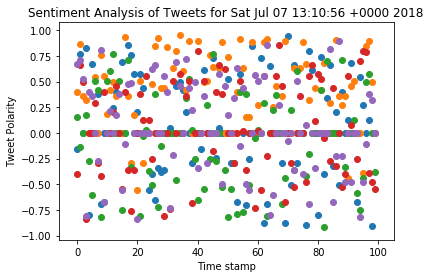

In [19]:
for user in target_user:
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    time_stamp = []
    twitter_search(user)

In [20]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Text,User
0,-0.1531,Sun Jul 08 08:12:23 +0000 2018,0.853,0.085,0.062,RT @bbc5live: Just in case you missed this las...,@BBC
1,0.7650,Sun Jul 08 08:12:10 +0000 2018,0.777,0.000,0.223,"RT @BBCWorld: Hang on boys, rescue is coming. ...",@BBC
2,0.0000,Sun Jul 08 08:12:00 +0000 2018,1.000,0.000,0.000,RT @BBCFood: 7 recipes for all the gluten-free...,@BBC
3,0.8260,Sun Jul 08 08:11:54 +0000 2018,0.566,0.000,0.434,RT @BBCBreakfast: Everyone needs this deliciou...,@BBC
4,-0.8020,Sun Jul 08 08:11:03 +0000 2018,0.676,0.324,0.000,RT @BBCNewsNI: Motorcycle racer William Dunlop...,@BBC


In [21]:
sentiments_pd.to_csv('Output/sentiments_pd.csv')

In [26]:
grouped = sentiments_pd.groupby(['User']).mean()
grouped.head()

,Compound,Negative,Neutral,Positive
User,,,,
@BBC,0.058257,0.81266,0.08036,0.10699
@CBS,0.363259,0.78919,0.01471,0.19612
@CNN,-0.073167,0.83447,0.10224,0.06325
@FoxNews,0.045649,0.83422,0.07365,0.09208
@nytimes,0.059722,0.84841,0.06477,0.08683


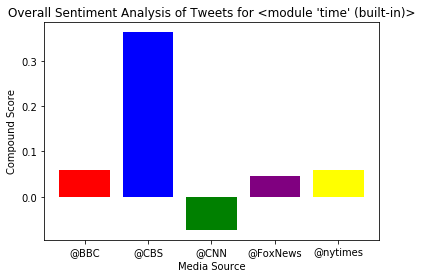

In [32]:
overall_sentiment = grouped['Compound']
color = ['red','blue','green','purple','yellow']
plt.bar(target_user, overall_sentiment, align='center', color = color)
plt.title(f"Overall Sentiment Analysis of Tweets for {time}")
plt.ylabel("Compound Score")
plt.xlabel("Media Source")
plt.savefig('Output/Overall_sentiment.png')

## Analysis of Plots
- There does not seem to be any correlations between time and sentiments of the tweets from each news source.
- CBS tends to be slightly more positive than the others, but most of them are pretty scattered from time to time. 
- The news from each media source is very polarized and ranges from the most negative to most positive.
- CBS also has the highest mean compound score, which shows that they are very polarized in their news. On the other hand, CNN has the lowest mean compound score, which shows that they are more negative than the other sources.